<a href="https://colab.research.google.com/github/RoseBorges44/I2A2-ABDI/blob/main/I2A2_%E2%80%93ABDI_%E2%80%93Desafio_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***I2A2 –ABDI –Desafio 4***

Rosemeri Borges

#***Behavior Classification***

*Sua missão:*<br/>
Criar um classificador que a partir de um ou mais registros, possa classificar o comportamento do indivíduo naquele momento.

##**Regras do Jogo**
*Atividades:*<br/>
• Fazer a análise exploratória dos dados<br/>
• Criar o classificador<br/>
• Gerar relatório com os resultados<br/>
• Escolher 1 ou mais métricas e explicar os resultados obtidos.<br/>
• Lembre-se que este é um classificador multiclasse, então você deverá analisar também cada uma das classes.



##**Análise Exploratória dos Dados**

**- Entendimento dos Dados:** Obter uma compreensão do conjunto de dados, suas variáveis e suas relações.<br/>
**- Tratamento de Dados:** Lidar com valores ausentes, dados categóricos, normalização de dados, se necessário.<br/>
**- Visualização dos Dados:** Gráficos, histogramas, boxplots para entender a distribuição das características.

In [1]:
import pandas as pd

# Carregar o arquivo CSV (substitua 'nome_do_arquivo.csv' pelo nome real do seu arquivo)
dados = pd.read_csv('/content/behavior_dataset.csv')

# Visualizar as primeiras linhas do conjunto de dados
print(dados.head())

# Verificar informações sobre o conjunto de dados
print(dados.info())

# Resumo estatístico das características numéricas
print(dados.describe())


             timestamp        x        y        z  subject_id  behavior
0  2021-08-17 07:37:24 -0.49219  0.03125 -0.93750           7       NaN
1  2021-08-17 07:37:25 -0.41406  0.01562 -0.89062           7       NaN
2  2021-08-17 07:37:26 -0.34375 -0.09375 -0.92188           7       NaN
3  2021-08-17 07:37:29 -0.38281  0.10938 -0.87500           7       NaN
4  2021-08-17 07:37:30 -0.35938 -0.15625 -0.87500           7       NaN
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1430740 entries, 0 to 1430739
Data columns (total 6 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   timestamp   1430740 non-null  object 
 1   x           1430740 non-null  float64
 2   y           1430740 non-null  float64
 3   z           1430740 non-null  float64
 4   subject_id  1430740 non-null  int64  
 5   behavior    289710 non-null   float64
dtypes: float64(4), int64(1), object(1)
memory usage: 65.5+ MB
None
                  x             y           

In [2]:
# Verificar valores ausentes
print(dados.isnull().sum())



timestamp           0
x                   0
y                   0
z                   0
subject_id          0
behavior      1141030
dtype: int64


In [3]:
# Converter dados categóricos usando one-hot encoding
dados_codificados = pd.get_dummies(dados, columns=['subject_id'])


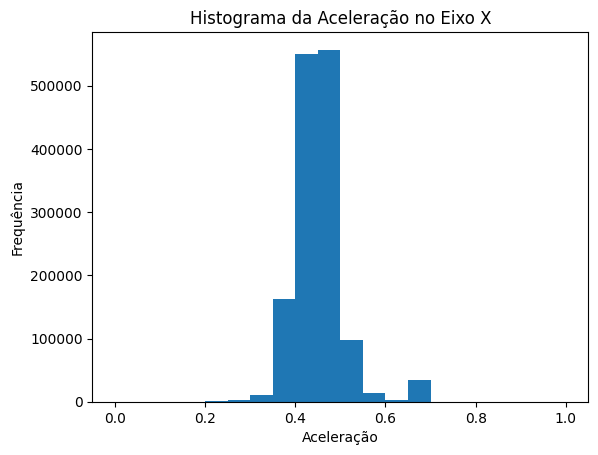

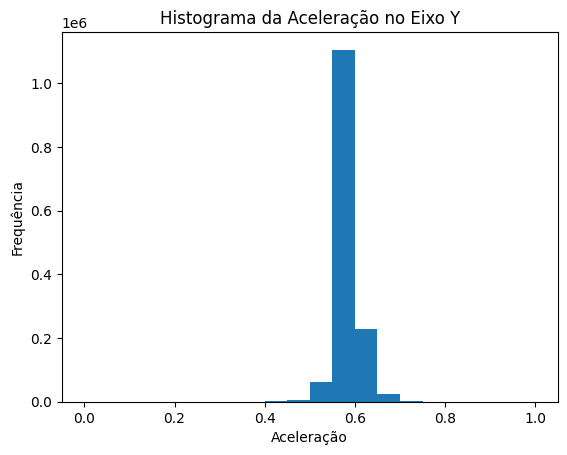

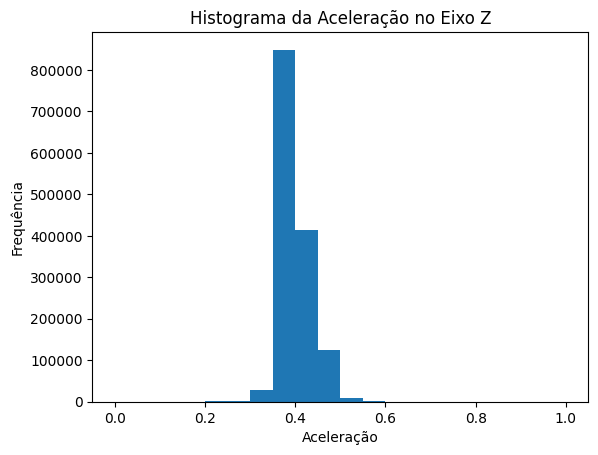

In [5]:
# HISTOGRAMAS

import matplotlib.pyplot as plt

# Histograma da aceleração no eixo x
plt.hist(dados['x'], bins=20)
plt.title('Histograma da Aceleração no Eixo X')
plt.xlabel('Aceleração')
plt.ylabel('Frequência')
plt.show()

# Histograma da aceleração no eixo y
plt.hist(dados['y'], bins=20)
plt.title('Histograma da Aceleração no Eixo Y')
plt.xlabel('Aceleração')
plt.ylabel('Frequência')
plt.show()

# Histograma da aceleração no eixo z
plt.hist(dados['z'], bins=20)
plt.title('Histograma da Aceleração no Eixo Z')
plt.xlabel('Aceleração')
plt.ylabel('Frequência')
plt.show()


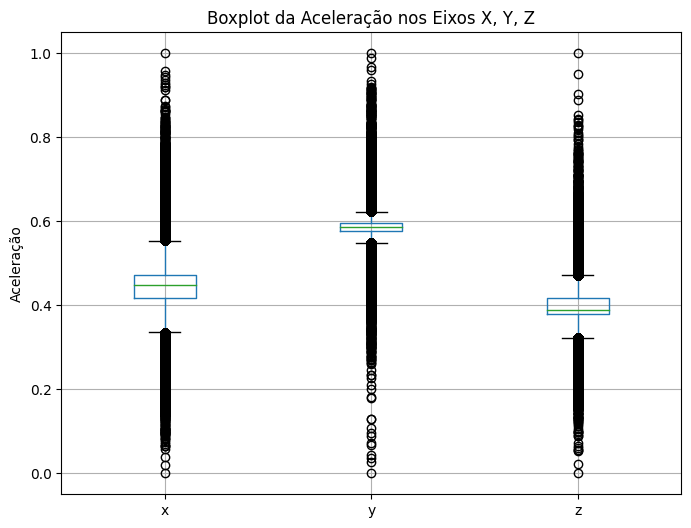

In [6]:
# Boxplot da aceleração nos três eixos
plt.figure(figsize=(8, 6))
dados[['x', 'y', 'z']].boxplot()
plt.title('Boxplot da Aceleração nos Eixos X, Y, Z')
plt.ylabel('Aceleração')
plt.show()


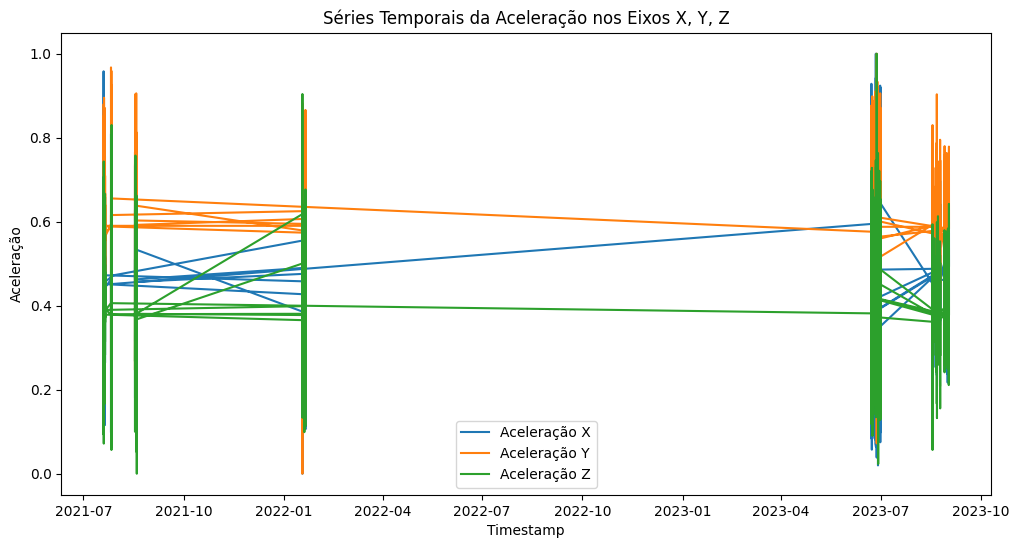

In [7]:
# Converter o timestamp para o formato datetime se ainda não estiver
dados['timestamp'] = pd.to_datetime(dados['timestamp'])

# Plotar séries temporais da aceleração nos três eixos
plt.figure(figsize=(12, 6))
plt.plot(dados['timestamp'], dados['x'], label='Aceleração X')
plt.plot(dados['timestamp'], dados['y'], label='Aceleração Y')
plt.plot(dados['timestamp'], dados['z'], label='Aceleração Z')
plt.title('Séries Temporais da Aceleração nos Eixos X, Y, Z')
plt.xlabel('Timestamp')
plt.ylabel('Aceleração')
plt.legend()
plt.show()


##**Criação do Classificador**

**- Seleção de Algoritmo:** Escolher um modelo de classificação adequado (como árvores de decisão, SVM, redes neurais, etc.).<br/>
**- Treinamento do Modelo:** Dividir os dados em conjuntos de treinamento e teste, treinar o modelo e ajustar os hiperparâmetros.<br/>
**- Avaliação do Modelo:** Utilizar métricas de avaliação para medir a precisão do classificador.

**Preparação dos Dados:**

In [16]:
from sklearn.model_selection import train_test_split

# Separar os dados em features (X) e target (y)
X = dados[['x', 'y', 'z']]
y = dados['behavior']

# Dividir os dados em conjunto de treino e teste (80% treino, 20% teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



**Criação do Modelo:**

In [17]:
from sklearn.ensemble import RandomForestClassifier

# Inicializar o classificador Random Forest
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Treinar o classificador
rf_classifier.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

**Avaliação do Modelo:**


In [18]:
from sklearn.metrics import classification_report, accuracy_score

# Prever os comportamentos no conjunto de teste
predictions = rf_classifier.predict(X_test)

# Avaliar a precisão do modelo
accuracy = accuracy_score(y_test, predictions)
print(f"Acurácia do Random Forest: {accuracy:.2f}")

# Gerar o relatório com métricas de classificação
print(classification_report(y_test, predictions))


Acurácia do Random Forest: 0.85
              precision    recall  f1-score   support

         0.0       0.87      0.97      0.92    244444
         1.0       0.01      0.00      0.00      1913
         2.0       0.56      0.27      0.36     20211
         3.0       0.22      0.07      0.10     19580

    accuracy                           0.85    286148
   macro avg       0.42      0.33      0.35    286148
weighted avg       0.80      0.85      0.82    286148



**Exibir a Importância das Características:**

In [19]:
# Exibir a importância das características
feature_importance = rf_classifier.feature_importances_
print("Importância das Características:")
for i, feature in enumerate(['x', 'y', 'z']):
    print(f"{feature}: {feature_importance[i]}")


Importância das Características:
x: 0.36431449552209894
y: 0.3155985010736125
z: 0.3200870034042886


**Plotar um Gráfico de Barras para a Importância das Características:**

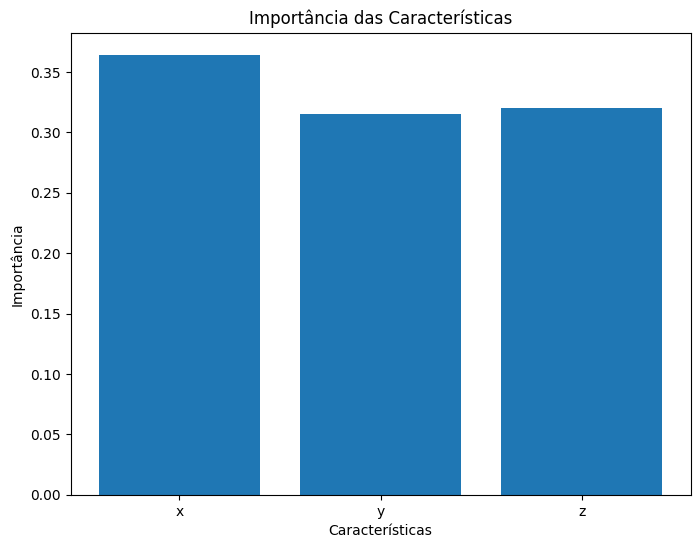

In [20]:
import matplotlib.pyplot as plt

# Plotar um gráfico de barras para a importância das características
plt.figure(figsize=(8, 6))
plt.bar(['x', 'y', 'z'], feature_importance)
plt.title('Importância das Características')
plt.xlabel('Características')
plt.ylabel('Importância')
plt.show()


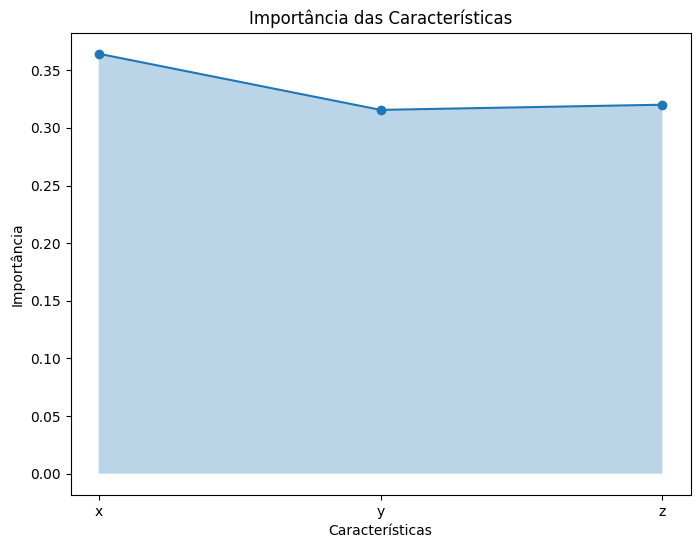

In [21]:
plt.figure(figsize=(8, 6))
plt.plot(['x', 'y', 'z'], feature_importance, marker='o')
plt.fill_between(['x', 'y', 'z'], feature_importance, alpha=0.3)
plt.title('Importância das Características')
plt.xlabel('Características')
plt.ylabel('Importância')
plt.show()


##**Relatório de Resultados**

**- Métricas de Avaliação:** Escolher métricas como precisão, recall, F1-score para cada classe do classificador multiclasse.<br/>
**- Interpretação dos Resultados:**  Explicar o desempenho do classificador para cada classe e no geral.<br/>
**- Recomendações e Melhorias:** Identificar áreas para melhorias e possíveis ajustes no modelo.

In [23]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Calcular métricas para cada classe
precision = precision_score(y_test, predictions, average=None)
recall = recall_score(y_test, predictions, average=None)
f1 = f1_score(y_test, predictions, average=None)

# Calcular métricas médias
precision_avg = precision_score(y_test, predictions, average='weighted')
recall_avg = recall_score(y_test, predictions, average='weighted')
f1_avg = f1_score(y_test, predictions, average='weighted')

# Exibir as métricas para cada classe e médias
print("Métricas para cada classe:")
for i in range(len(precision)):
    print(f"Classe {i}: Precision={precision[i]:.2f}, Recall={recall[i]:.2f}, F1-Score={f1[i]:.2f}")

print("\nMétricas médias:")
print(f"Precision (média): {precision_avg:.2f}")
print(f"Recall (média): {recall_avg:.2f}")
print(f"F1-Score (média): {f1_avg:.2f}")


Métricas para cada classe:
Classe 0: Precision=0.87, Recall=0.97, F1-Score=0.92
Classe 1: Precision=0.01, Recall=0.00, F1-Score=0.00
Classe 2: Precision=0.56, Recall=0.27, F1-Score=0.36
Classe 3: Precision=0.22, Recall=0.07, F1-Score=0.10

Métricas médias:
Precision (média): 0.80
Recall (média): 0.85
F1-Score (média): 0.82


**Interpretação dos Resultados:**
<br/>
**Precisão (Precision)**: Mede a proporção de positivos previstos corretamente em relação a todos os positivos previstos pelo modelo para uma classe específica.<br/>
**Revocação (Recall):** Mede a proporção de positivos previstos corretamente em relação a todos os verdadeiros positivos para uma classe específica.<br/>
**F1-Score:** É a média harmônica entre precisão e recall, fornecendo uma métrica balanceada entre os dois.

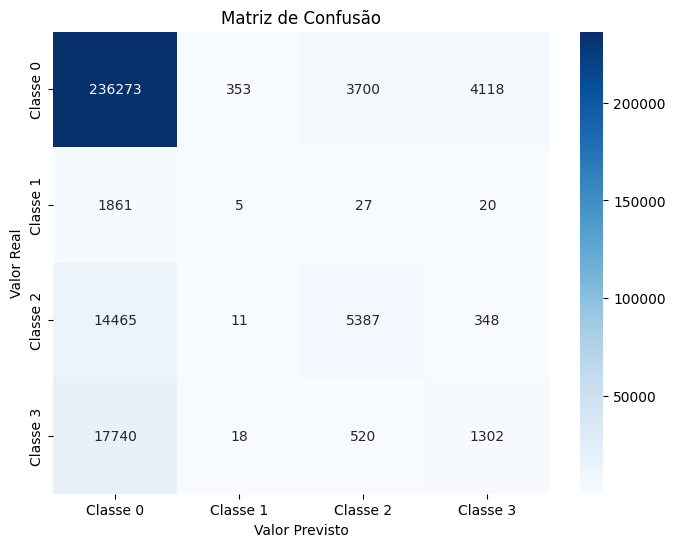

In [25]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calcular a matriz de confusão
conf_matrix = confusion_matrix(y_test, predictions)

# Plotar a matriz de confusão usando seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Classe 0', 'Classe 1', 'Classe 2', 'Classe 3'], yticklabels=['Classe 0', 'Classe 1', 'Classe 2', 'Classe 3'])
plt.title('Matriz de Confusão')
plt.xlabel('Valor Previsto')
plt.ylabel('Valor Real')
plt.show()



In [26]:
from sklearn.metrics import confusion_matrix

# Exemplo: Calcular a matriz de confusão
conf_matrix = confusion_matrix(y_test, predictions)

# Função para imprimir a matriz de confusão em texto
def print_confusion_matrix(matrix):
    for row in matrix:
        print(" ".join(str(elem) for elem in row))

# Chamar a função para imprimir a matriz de confusão em texto
print("Matriz de Confusão:")
print_confusion_matrix(conf_matrix)


Matriz de Confusão:
236273 353 3700 4118
1861 5 27 20
14465 11 5387 348
17740 18 520 1302


**Para facilitar a interpretação:**

A linha 0 (primeira linha) se refere à Classe 0.<br/>
A linha 1 (segunda linha) se refere à Classe 1.<br/>
A linha 2 (terceira linha) se refere à Classe 2.<br/>
A linha 3 (quarta linha) se refere à Classe 3.<br/>
<br/>
**Interpretação por classe:**

A Classe 0 tem um número alto de verdadeiros positivos (236273), mas alguns falsos negativos em relação à Classe 2, 3 e 4.<br/>
A Classe 1 tem valores muito baixos em todas as previsões, indicando que pode ter tido dificuldades em ser prevista corretamente pelo modelo.<br/>
A Classe 2 tem um número alto de verdadeiros positivos (5387) e alguns falsos positivos em relação às outras classes.<br/>
A Classe 3 tem valores variados, com um número considerável de verdadeiros positivos (1302) e alguns falsos positivos.

##***RESUMO***

**Métricas para cada Classe:**

**Classe 0:** Boa precisão (87%) e recall alto (97%), indicando que o modelo está performando bem nessa classe.<br/>
**Classe 1:** Precisão e recall extremamente baixos, o que sugere que o modelo não está conseguindo identificar corretamente essa classe.<br/>
**Classe 2:** Precisão razoável (56%) e recall moderado (27%), com F1-score indicando um desempenho médio.<br/>
**Classe 3:** Precisão baixa (22%) e recall baixo (7%), indicando dificuldades em prever essa classe.<br/>
<br/>

**Métricas Médias:**<br/>

**Precision (média)**: 0.80<br/>
**Recall (média):** 0.85<br/>
**F1-Score (média):** 0.82<br/>
<br/>
#**Conclusão:**<br/>
- O modelo possui um desempenho considerável para a Classe 0, com alta precisão e recall.<br/>
- Porém, para as Classes 1, 2 e 3, o desempenho é bastante variado, com dificuldades significativas em prever a Classe 1 e desempenho moderado nas Classes 2 e 3.<br/>
- As métricas médias indicam um desempenho geral decente do modelo, mas é essencial melhorar a capacidade de previsão para as classes com desempenho inferior, especialmente a Classe 1, que está com valores muito baixos em todas as métricas.<br/>

